In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import warnings
import pandas as pd
import os
import glob
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.table import Table
import scipy as scipy
from scipy import optimize
np.set_printoptions(threshold=np.inf)
from scipy.optimize import differential_evolution

In [3]:
hdulist = fits.open('../data/composite_Io_disk.fits')
evt_data = Table(hdulist[1].data)
image_data = hdulist[1].data
df = pd.read_csv('../data/io_on_disk.csv') #spaces in csv file will make df object type and not float64
#line = "S I"
#target_mask = df.Species.str.endswith(line) #probably a better function but idk it right now
#df = df[target_mask]
df_wavelength = df['Wavelength']
df_species = df['Species']
wl = evt_data['WAVELENGTH'].data
flux = evt_data['FLUX'].data

In [4]:
hdulist2 = fits.open('../data/composite_Io_eclipsed (1).fits')
evt_data2 = Table(hdulist2[1].data)
image_data2 = hdulist2[1].data
df2 = pd.read_csv('../data/io_on_disk.csv') #spaces in csv file will make df object type and not float64
#line = "S I"
#target_mask = df.Species.str.endswith(line) #probably a better function but idk it right now
#df = df[target_mask]
df_wavelength2 = df2['Wavelength']
df_species2 = df2['Species']
wl2 = evt_data2['WAVELENGTH'].data
flux2 = evt_data2['FLUX'].data

In [5]:
hdulist3 = fits.open('../data/composite_Io_sunlit.fits')
evt_data3 = Table(hdulist3[1].data)
image_data3 = hdulist3[1].data
df3 = pd.read_csv('../data/io_on_disk.csv') #spaces in csv file will make df object type and not float64
#line = "S I"
#target_mask = df.Species.str.endswith(line) #probably a better function but idk it right now
#df = df[target_mask]
df_wavelength3 = df3['Wavelength']
df_species3 = df3['Species']
wl3 = evt_data3['WAVELENGTH'].data
flux3 = evt_data3['FLUX'].data

(-10.0, 1300.0)

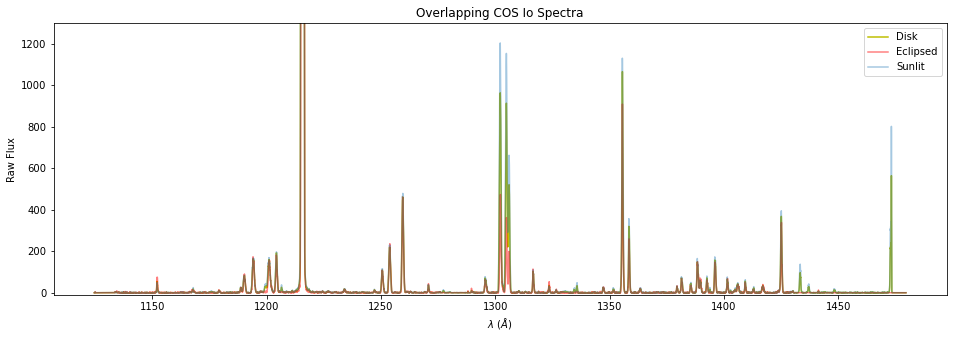

In [6]:
plt.figure(figsize=(16, 5))
plt.plot(evt_data['WAVELENGTH'].T, evt_data['FLUX'].T,label='Disk',color='y') #make it columns instead of rows bc otherwise will be a blank plot
plt.plot(evt_data2['WAVELENGTH'].T, evt_data2['FLUX'].T, label='Eclipsed',alpha=0.5,color='r') #make it columns instead of rows bc otherwise will be a blank plot
plt.plot(evt_data3['WAVELENGTH'].T, evt_data3['FLUX'].T, label='Sunlit',alpha=0.4)
plt.xlabel('$\lambda$ ($\AA$)');
plt.ylabel('Raw Flux')
plt.title("Overlapping COS Io Spectra")
plt.legend()
plt.ylim(-10,1300)
#plt.xlim(1420,1430)

This is the off-disk spectrum versus the on-disk spectrum.

In [7]:
hdulist4 = fits.open('../data/composite_Io_jets.fits')
evt_data4 = Table(hdulist4[1].data)
image_data4 = hdulist4[1].data
df4 = pd.read_csv('../data/io_on_disk.csv') #spaces in csv file will make df object type and not float64
#line = "S I"
#target_mask = df.Species.str.endswith(line) #probably a better function but idk it right now
#df = df[target_mask]
df_wavelength4 = df4['Wavelength']
df_species4 = df4['Species']
wl4 = evt_data4['WAVELENGTH'].data
flux4 = evt_data4['FLUX'].data

(-10.0, 1300.0)

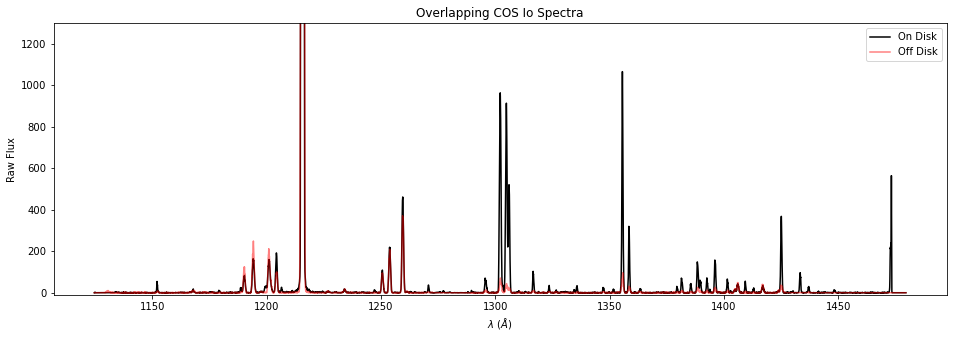

In [17]:
plt.figure(figsize=(16, 5))
plt.plot(evt_data['WAVELENGTH'].T, evt_data['FLUX'].T,label='On Disk',color='black') #make it columns instead of rows bc otherwise will be a blank plot
plt.plot(evt_data4['WAVELENGTH'].T, evt_data4['FLUX'].T, label='Off Disk',alpha=0.5,color='r') #make it columns instead of rows bc otherwise will be a blank plot
plt.xlabel('$\lambda$ ($\AA$)');
plt.ylabel('Raw Flux')
plt.title("Overlapping COS Io Spectra")
plt.legend()
plt.ylim(-10,1300)

(-10.0, 1300.0)

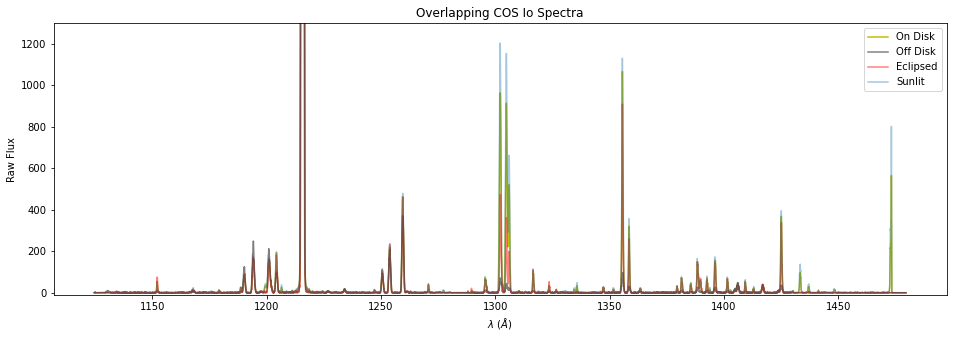

In [15]:
plt.figure(figsize=(16, 5))
plt.plot(evt_data['WAVELENGTH'].T, evt_data['FLUX'].T,label='On Disk',color='y') #make it columns instead of rows bc otherwise will be a blank plot
plt.plot(evt_data4['WAVELENGTH'].T, evt_data4['FLUX'].T, label='Off Disk',alpha=0.5,color='black') #make it columns instead of rows bc otherwise will be a blank plot
plt.plot(evt_data2['WAVELENGTH'].T, evt_data2['FLUX'].T, label='Eclipsed',alpha=0.5,color='r') #make it columns instead of rows bc otherwise will be a blank plot
plt.plot(evt_data3['WAVELENGTH'].T, evt_data3['FLUX'].T, label='Sunlit',alpha=0.4)
plt.xlabel('$\lambda$ ($\AA$)');
plt.ylabel('Raw Flux')
plt.title("Overlapping COS Io Spectra")
plt.legend()
plt.ylim(-10,1300)